<a href="https://colab.research.google.com/github/artem-dorofeev/py_DataScience_HW/blob/main/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

*напишіть функцію гіпотези лінійної регресії у векторному вигляді*

In [2]:
import numpy as np

def hypothesis(W, X):
    return np.dot(X, W)


*створіть функцію для обчислення функції втрат у векторному вигляді*

In [3]:
def compute_loss(W, X, Y):
    m = len(Y)
    predictions = hypothesis(W, X)
    squared_errors = (predictions - Y) ** 2
    loss = np.sum(squared_errors) / (2 * m)
    return loss


*реалізуйте один крок градієнтного спуску*

In [4]:
def gradient_descent_step(W, X, Y, learning_rate):
    m = len(Y)
    predictions = hypothesis(W, X)
    errors = predictions - Y
    gradient = np.dot(X.T, errors) / m
    W = W - learning_rate * gradient
    return W


*знайдіть найкращі параметри $\vec{w}$ для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень*

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

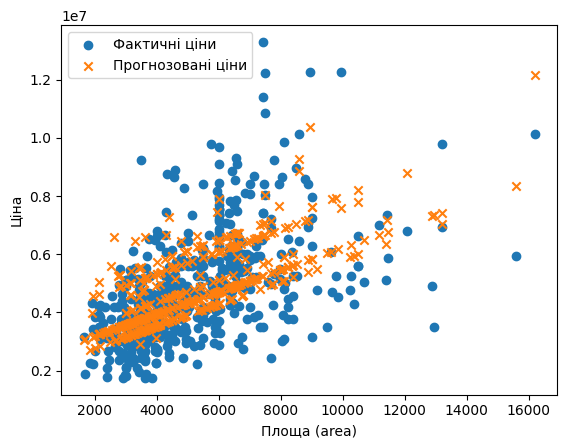

In [7]:
df = pd.read_csv('Housing.csv')

print(df.head())
print(df.info())

X = df[['area', 'bathrooms', 'bedrooms']].values
Y = df['price'].values.reshape(-1, 1)

X_normalized = (X - X.mean(axis=0)) / X.std(axis=0)

X_normalized = np.hstack((np.ones((X_normalized.shape[0], 1)), X_normalized))

W_initial = np.zeros((X_normalized.shape[1], 1))

learning_rate = 0.01
num_iterations = 1000

W_optimal = W_initial
for _ in range(num_iterations):
    W_optimal = gradient_descent_step(W_optimal, X_normalized, Y, learning_rate)

print("Оптимальні параметри:")
print(W_optimal)

predictions = np.dot(X_normalized, W_optimal)

plt.scatter(df['area'], df['price'], label='Фактичні ціни')
plt.scatter(df['area'], predictions, label='Прогнозовані ціни', marker='x')
plt.xlabel('Площа (area)')
plt.ylabel('Ціна')
plt.legend()
plt.show()


*знайдіть ці ж параметри за допомогою аналітичного рішення*

W=(XTX)−1XTYW=(XTX)−1XTY

де:

    WW - вектор параметрів моделі,
    XX - матриця вхідних ознак (з врахуванням зсуву),
    YY - вектор цільових значень.*

Оптимальні параметри (аналітичне рішення):
[[4766729.24770642]
 [ 821214.14349519]
 [ 695808.52272538]
 [ 299983.57107963]]


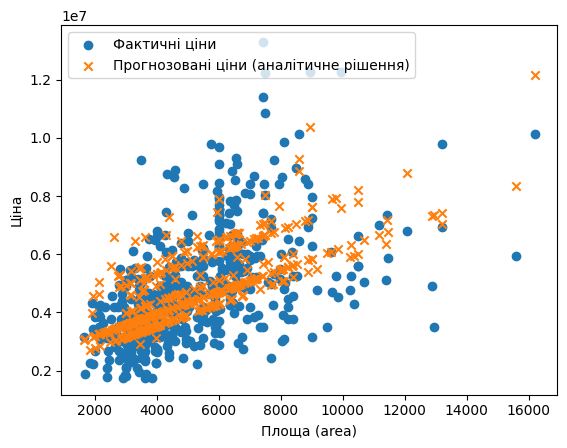

In [9]:
X = df[['area', 'bathrooms', 'bedrooms']].values
Y = df['price'].values.reshape(-1, 1)

X_normalized = (X - X.mean(axis=0)) / X.std(axis=0)

X_normalized = np.hstack((np.ones((X_normalized.shape[0], 1)), X_normalized))

W_optimal_analytical = np.linalg.inv(X_normalized.T @ X_normalized) @ X_normalized.T @ Y

print("Оптимальні параметри (аналітичне рішення):")
print(W_optimal_analytical)

predictions_analytical = np.dot(X_normalized, W_optimal_analytical)

plt.scatter(df['area'], df['price'], label='Фактичні ціни')
plt.scatter(df['area'], predictions_analytical, label='Прогнозовані ціни (аналітичне рішення)', marker='x')
plt.xlabel('Площа (area)')
plt.ylabel('Ціна')
plt.legend()
plt.show()


*порівняйте отримані результати*

Epoch 0, Cost: 25219140065621.176
Epoch 100, Cost: 2185481943246.0325
Epoch 200, Cost: 1798260930107.2458
Epoch 300, Cost: 1791308560437.6514
Epoch 400, Cost: 1791173538615.2485
Epoch 500, Cost: 1791170194782.8806
Epoch 600, Cost: 1791170059254.0845
Epoch 700, Cost: 1791170050686.6106
Epoch 800, Cost: 1791170050034.2097
Epoch 900, Cost: 1791170049981.9348

Оптимальні параметри (градієнтний спуск):
[[4766729.23968417]
 [ 821214.21404293]
 [ 695807.95407458]
 [ 299984.10905678]]


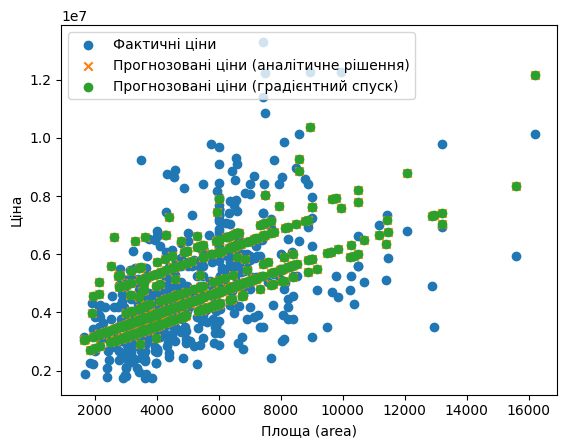

In [12]:
def hypothesis(W, X):
    return np.dot(X, W)

def loss_function(theta, x, y):
    predictions = hypothesis(theta, x)
    error = predictions - y
    return np.mean(error**2)

def gradient_descent(x, y, learning_rate, epochs):
    theta = np.zeros((x.shape[1], 1))
    m = len(y)

    for epoch in range(epochs):
        predictions = hypothesis(theta, x)
        error = predictions - y
        gradient = 2/m * np.dot(x.T, error)
        theta -= learning_rate * gradient

        if epoch % 100 == 0:
            cost = loss_function(theta, x, y)
            print(f"Epoch {epoch}, Cost: {cost}")

    return theta

df = pd.read_csv('Housing.csv')

X = df[['area', 'bathrooms', 'bedrooms']].values
Y = df['price'].values.reshape(-1, 1)

X_normalized = (X - X.mean(axis=0)) / X.std(axis=0)

X_normalized = np.hstack((np.ones((X_normalized.shape[0], 1)), X_normalized))

learning_rate = 0.01
epochs = 1000

W_optimal_gradient_descent = gradient_descent(X_normalized, Y, learning_rate, epochs)

print("\nОптимальні параметри (градієнтний спуск):")
print(W_optimal_gradient_descent)

predictions_gradient_descent = hypothesis(W_optimal_gradient_descent, X_normalized)

plt.scatter(df['area'], df['price'], label='Фактичні ціни')
plt.scatter(df['area'], predictions_analytical, label='Прогнозовані ціни (аналітичне рішення)', marker='x')
plt.scatter(df['area'], predictions_gradient_descent, label='Прогнозовані ціни (градієнтний спуск)', marker='o')
plt.xlabel('Площа (area)')
plt.ylabel('Ціна')
plt.legend()
plt.show()
